## Graph with Single Inputs:

In [2]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph # framework that helps you design and manage the flow of tasks in your application using a graph structure

In [4]:
 #We now create an AgentState - shared data structure that keeps track of information as your application runs. 

class AgentState(TypedDict): # Our state schema
    message : str 

def greeting_node(state: AgentState) -> AgentState:
    """simple node that adds a greetig method to the satte"""

    state['message'] = "Hey " + state["message"] + ", how is your day going?"
    return state


In [5]:
graph = StateGraph(AgentState)

graph.add_node("greeter", greeting_node)

graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app = graph.compile()

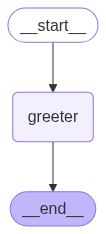

In [8]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

# Graph with Multiple Inputs:

In [23]:
from typing import TypedDict, List
from langgraph.graph import StateGraph 

In [24]:
class AgentState(TypedDict):
    values : List[int]
    name : str
    result : str

### Node: 

In [26]:
def process_values(state: AgentState) -> AgentState:
    """This function handles multiple different inputs"""

    state['result'] = f"Hi there {state['name']}! Your sum = {sum(state['values'])}"
    return state

## Create graph

In [27]:
graph = StateGraph(AgentState)

graph.add_node("sum", process_values)

graph.set_entry_point("sum")
graph.set_finish_point("sum")

app= graph.compile()

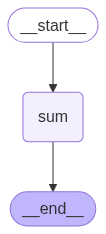

In [28]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

## Invoke

In [30]:
result = app.invoke({"values": [1,2,3,4,5], "name": "Steve"})
result['result']

'Hi there Steve! Your sum = 15'

In [31]:
result

{'values': [1, 2, 3, 4, 5],
 'name': 'Steve',
 'result': 'Hi there Steve! Your sum = 15'}

## Task

In [ ]:
import math

class AgentState(TypedDict):
    name : str
    values: List[int]
    operation : str
    result : str

def operation(state: AgentState):
    if state['operation'] == "*":
        state["result"] = f"Hey {state['name']}, your multiplication is {math.prod(state['values'])}"
    else:
        state["result"] = f"Hey {state['name']}, your sum is {sum(state['values'])}"
    return state

In [36]:
graph = StateGraph(AgentState)

graph.add_node("operation", operation)

graph.set_entry_point("operation")
graph.set_entry_point("operation")

app= graph.compile()

app.invoke({"name": "John", "values": [1,2,3,4], "operation": "*"})

{'name': 'John',
 'values': [1, 2, 3, 4],
 'operation': '*',
 'result': 'Hey John, your multiplication is 24'}

In [37]:
app.invoke({"name": "John", "values": [1,2,3,4], "operation": "+"})

{'name': 'John',
 'values': [1, 2, 3, 4],
 'operation': '+',
 'result': 'Hey John, your sum is 10'}

# Sequential Graph

### Multiple Nodes

In [38]:
from typing import TypedDict # Imports all the data types we need
from langgraph.graph import StateGraph

In [43]:
class AgentState(TypedDict):
    name : str
    age : str
    final : str

def first_node(state:AgentState) -> AgentState:
    """This is the first node of our sequence"""

    state["final"] = f"Hi {state['name']}!"
    return state

def second_node(state:AgentState) -> AgentState:
    """This is the second node of our sequence"""

    state["final"] = state["final"] + f" You are {state['age']} years old!"

    return state

### Graph:

In [ ]:
graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)

graph.set_entry_point("first_node")
graph.set_finish_point("second_node")

graph.add_edge("first_node", "second_node")

app = graph.compile()



In [51]:
app.invoke({"name": "Phil", "age": "47"})

{'name': 'Phil', 'age': '47', 'final': 'Hi Phil! You are 47 years old!'}

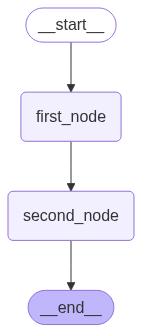

In [54]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_mermaid_png()))

## Exercise

In [75]:
class AgentState(TypedDict):
    name : str
    age: int
    skills : List[str]
    final :  str

def welcome(state):
    state['final'] = f"Hi {state['name']}"
    return state
def age(state):
    state['final'] =  state['final'] + f", you are {state['age']} years old."
    return state
def skills(state):
    state['final'] = state['final'] + f" Your skills are: {', '.join((state['skills']))}"
    return state

graph = StateGraph(AgentState)

graph.add_node("welcome", welcome)
graph.add_node("age", age)
graph.add_node("skills", skills)

graph.add_edge("welcome", "age")
graph.add_edge("age", "skills")

graph.set_entry_point("welcome")
graph.set_finish_point("skills")

app=graph.compile()

In [76]:
app.invoke({"name": "Phil", "age": "47", "skills": ["python", "ML", "Gen AI"] })

{'name': 'Phil',
 'age': '47',
 'skills': ['python', 'ML', 'Gen AI'],
 'final': 'Hi Phil, you are 47 years old. Your skills are: python, ML, Gen AI'}

In [80]:
skills = ['python', 'ML', 'Gen AI']
skills_string = ' '.join(skills)
print(skills_string)

python ML Gen AI
